In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data/sondage_harcelement.csv')

In [3]:
data

,Horodateur,"En temps normal, à quelle fréquence utilisez-vous les transports en commun ?","En temps normal, à quelle(s) heure(s) utilisez-vous les transports en commun ?",Dans quel cadre prenez-vous majoritairement les transports en commun ?,Quels types de transports en commun utilisez-vous ?,Quel temps passez-vous en moyenne dans les transports en commun par jour ?,Ressentez-vous de l'insécurité en prenant les transports en commun ?,"Si oui, à quelle(s) heure(s) ?",Avez-vous déjà été témoins de comportements correspondant à cette définition du harcèlement ?,Avez-vous déjà subi du harcèlement dans les transports en commun ?,...,"Si oui, l'avez-vous déjà utilisé ?.1",Pensez-vous que le dispositif d'arrêt à la demande soit une solution efficace pour éviter le harcèlement sexuel ou sexiste ?,Pourquoi ?.1,"Selon-vous, à quel point cette campagne de communication est-elle efficace pour lutter contre le harcèlement dans les transports en commun ?",Pourquoi ?.2,Quel est votre genre ?,Quel est votre âge ?,Quelle est votre catégorie socio-professionnelle ?,Dans quelle ville habitez-vous ?,Unnamed: 26
0,2022/01/12 4:58:23 PM UTC+1,Tous les jours,"Heures de pointe (7h30 - 9h30, 16h30 - 19h30);...",Déplacements scolaires/professionnels,"Métros, tramways;TER, transiliens",Moins de 30 minutes,8,Le soir (après 19h30),"Non, jamais","Oui, une seule fois",...,Non,2.0,NaN,3,NaN,Féminin,18 - 25 ans,Étudiant·e,Paris,NaN
1,2022/01/15 8:33:00 PM UTC+1,Tous les jours,"Heures de pointe (7h30 - 9h30, 16h30 - 19h30);...",Déplacements scolaires/professionnels,"Métros, tramways;Bus, car (jour)",Moins de 30 minutes,7,Le soir (après 19h30),"Oui, à plusieurs reprises","Oui, à plusieurs reprises",...,Non,2.0,NaN,2,NaN,Féminin,18 - 25 ans,Étudiant·e,Paris,Non
2,2022/01/15 8:37:10 PM UTC+1,Tous les jours,"Heures de pointe (7h30 - 9h30, 16h30 - 19h30);...",Déplacements scolaires/professionnels,"Métros, tramways;Bus, car (jour)",Moins de 30 minutes,7,Le soir (après 19h30),"Oui, à plusieurs reprises","Oui, à plusieurs reprises",...,Non,2.0,NaN,1,NaN,Féminin,18 - 25 ans,Étudiant·e,Paris,NaN
3,2022/01/16 2:41:45 PM UTC+1,Tous les jours,"Heures de pointe (7h30 - 9h30, 16h30 - 19h30);...",Déplacements scolaires/professionnels,"Métros, tramways;Trains longue distance (inter...",Entre 30 minutes et 1 heure,2,NaN,"Oui, à plusieurs reprises","Non, jamais",...,Non,3.0,"Pas tout le temps appliqué en pratique, limite...",1,Représentation caricaturale des agresseurs qui...,Masculin,18 - 25 ans,Étudiant·e,Paris,NaN
4,2022/01/16 8:26:04 PM UTC+1,Tous les jours,"Heures de pointe (7h30 - 9h30, 16h30 - 19h30)",Déplacements scolaires/professionnels,"Métros, tramways;TER, transiliens;Trains longu...",Entre 1 heure et 2 heures,6,"Heures de pointe (7h30 - 9h30, 16h30 - 19h30);...","Oui, une seule fois","Oui, à plusieurs reprises",...,Non,4.0,NaN,3,NaN,Féminin,26 - 35 ans,Étudiant·e,Palaiseau,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621,2022/02/20 10:43:40 PM UTC+1,Tous les jours,"Heures de pointe (7h30 - 9h30, 16h30 - 19h30)",Déplacements scolaires/professionnels,"Métros, tramways;TER, transiliens",Plus de 2 heures,8,Le soir (après 19h30),"Oui, à plusieurs reprises","Oui, à plusieurs reprises",...,Non,NaN,NaN,4,NaN,Féminin,18 - 25 ans,Étudiant·e,Villeparisis,NaN
622,2022/02/20 10:53:17 PM UTC+1,Tous les jours,"Heures de pointe (7h30 - 9h30, 16h30 - 19h30)",Déplacements scolaires/professionnels,"Métros, tramways",Plus de 2 heures,6,"Heures de pointe (7h30 - 9h30, 16h30 - 19h30);...","Oui, à plusieurs reprises","Oui, à plusieurs reprises",...,Non,4.0,Très bonne solution mais dire que c’est « très...,2,Une campagne qui sensibilise les victimes mais...,Féminin,26 - 35 ans,Employé·es et personnel de service,Saint Denis,NaN
623,2022/02/21 12:08:17 AM UTC+1,Tous les jours,"Heures de pointe (7h30 - 9h30, 16h30 - 19h30)",Déplacements scolaires/professionnels,"Métros, tramways;Bus, car (jour)",Entre 30 minutes et 1 heure,8,Le soir (après 19h30

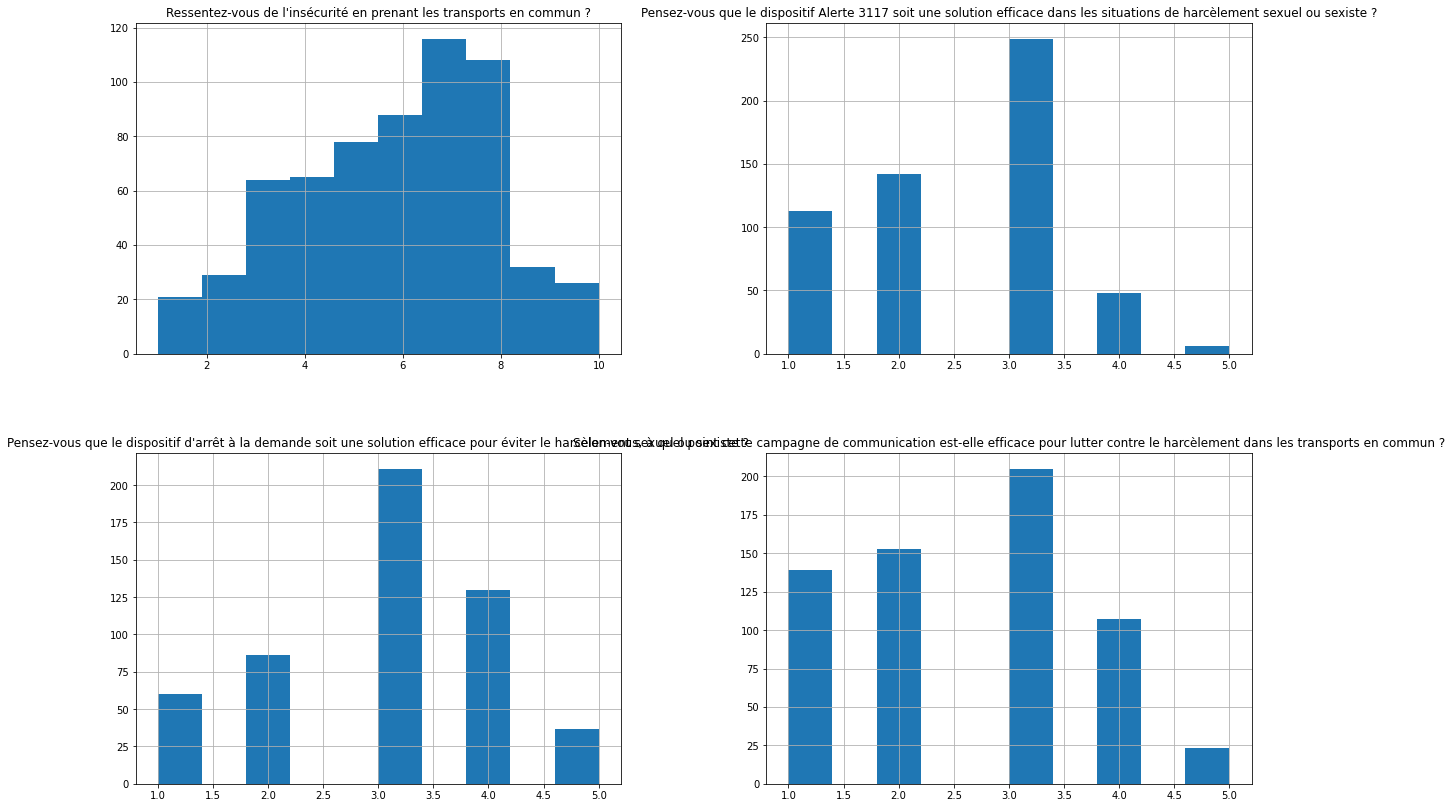

In [5]:
_ = data.hist(figsize=(20, 14))

In [6]:
target_column = 'Quel est votre genre ?'
target = data[target_column]
data[target_column].value_counts()

Féminin                                       570
Masculin                                       47
Je ne me reconnais pas dans ces catégories     10
Name: Quel est votre genre ?, dtype: int64

In [23]:
numerical_columns = [
                    "Ressentez-vous de l'insécurité en prenant les transports en commun ?",
                    "Pensez-vous que le dispositif Alerte 3117 soit une solution efficace dans les situations de harcèlement sexuel ou sexiste ?", 
                    "Pensez-vous que le dispositif d'arrêt à la demande soit une solution efficace pour éviter le harcèlement sexuel ou sexiste ?", 
                    "Selon-vous, à quel point cette campagne de communication est-elle efficace pour lutter contre le harcèlement dans les transports en commun ?"
                    ]
categorical_columns = [
                    'En temps normal, à quelle fréquence utilisez-vous les transports en commun ?',
                    'En temps normal, à quelle(s) heure(s) utilisez-vous les transports en commun ?',
                    'Dans quel cadre prenez-vous majoritairement les transports en commun ?',
                    'Quels types de transports en commun utilisez-vous ?',
                    'Quel temps passez-vous en moyenne dans les transports en commun par jour ?',
                    'Si oui,  à quelle(s) heure(s) ?',
                    'Avez-vous déjà été témoins de comportements correspondant à cette définition du harcèlement ?',
                    'Avez-vous déjà subi du harcèlement dans les transports en commun ?',
                    'Si oui, est-ce-que cette expérience a entrainé un ou plusieurs changements de comportement de votre part ?',
                    'Si oui, avez-vous été victime de violences physiques en lien avec ce harcèlement ? ',
                    'Quel est votre genre ?', 
                    'Quel est votre âge ?',
                    'Quelle est votre catégorie socio-professionnelle ?',
                    'Dans quelle ville habitez-vous ?'
                    ]

all_columns = numerical_columns + categorical_columns

data_cleaned = data[all_columns]

In [24]:
data_categorical = data[categorical_columns]
data_categorical.head()

,"En temps normal, à quelle fréquence utilisez-vous les transports en commun ?","En temps normal, à quelle(s) heure(s) utilisez-vous les transports en commun ?",Dans quel cadre prenez-vous majoritairement les transports en commun ?,Quels types de transports en commun utilisez-vous ?,Quel temps passez-vous en moyenne dans les transports en commun par jour ?,"Si oui, à quelle(s) heure(s) ?",Avez-vous déjà été témoins de comportements correspondant à cette définition du harcèlement ?,Avez-vous déjà subi du harcèlement dans les transports en commun ?,"Si oui, est-ce-que cette expérience a entrainé un ou plusieurs changements de comportement de votre part ?","Si oui, avez-vous été victime de violences physiques en lien avec ce harcèlement ?",Quel est votre genre ?,Quel est votre âge ?,Quelle est votre catégorie socio-professionnelle ?,Dans quelle ville habitez-vous ?
0,Tous les jours,"Heures de pointe (7h30 - 9h30, 16h30 - 19h30);...",Déplacements scolaires/professionnels,"Métros, tramways;TER, transiliens",Moins de 30 minutes,Le soir (après 19h30),"Non, jamais","Oui, une seule fois",Changement de siège ou de wagon en cas de sent...,Non,Féminin,18 - 25 ans,Étudiant·e,Paris
1,2 à 3 fois par semaine,"Heures de pointe (7h30 - 9h30, 16h30 - 19h30)",Déplacements scolaires/professionnels,"Métros, tramways;Trains longue distance (inter...",Entre 1 heure et 2 heures,"Heures de pointe (7h30 - 9h30, 16h30 - 19h30)","Non, jamais","Non, jamais",Changement de siège ou de wagon en cas de sent...,Non,Féminin,55 - 65 ans,Professions intermédiaires (cadres moyens),Lyon
2,Tous les jours,"Heures de pointe (7h30 - 9h30, 16h30 - 19h30);...",Déplacements scolaires/professionnels,"Métros, tramways;Bus, car (jour)",Moins de 30 minutes,Le soir (après 19h30),"Oui, à plusieurs reprises","Oui, à plusieurs reprises",NaN,Non,Féminin,18 - 25 ans,Étudiant·e,Paris
3,Tous les jours,"Heures de pointe (7h30 - 9h30, 16h30 - 19h30);...",Déplacements scolaires/professionnels,"Métros, tramways;Bus, car (jour)",Moins de 30 minutes,Le soir (après 19h30),"Oui, à plusieurs reprises","Oui, à plusieurs reprises",Changement de siège ou de wagon en cas de sent...,Non,Féminin,18 - 25 ans,Étudiant·e,Paris
4,Tous les jours,"Heures de pointe (7h30 - 9h30, 16h30 - 19h30);...",Déplacements scolaires/professionnels,"Métros, tramways;Trains longue distance (inter...",Entre 30 minutes et 1 heure,NaN,"Oui, à plusieurs reprises","Non, jamais",NaN,NaN,Masculin,18 - 25 ans,Étudiant·e,Paris


In [25]:
print(f"The dataset is composed of {data_categorical.shape[1]} features")

The dataset is composed of 14 features


In [26]:
from sklearn.preprocessing import OrdinalEncoder

freq_use_column = data_categorical[["En temps normal, à quelle fréquence utilisez-vous les transports en commun ?"]]

encoder = OrdinalEncoder()
education_encoded = encoder.fit_transform(freq_use_column)
education_encoded

array([[38.],
       [ 3.],
       [38.],
       [38.],
       [38.],
       [38.],
       [38.],
       [ 2.],
       [38.],
       [ 3.],
       [38.],
       [38.],
       [38.],
       [38.],
       [ 2.],
       [ 3.],
       [38.],
       [38.],
       [38.],
       [38.],
       [38.],
       [38.],
       [ 3.],
       [38.],
       [38.],
       [38.],
       [38.],
       [38.],
       [38.],
       [38.],
       [38.],
       [ 3.],
       [ 3.],
       [38.],
       [38.],
       [ 3.],
       [38.],
       [ 3.],
       [ 2.],
       [38.],
       [ 3.],
       [38.],
       [38.],
       [38.],
       [ 3.],
       [38.],
       [38.],
       [30.],
       [ 3.],
       [38.],
       [ 3.],
       [38.],
       [38.],
       [38.],
       [38.],
       [38.],
       [38.],
       [38.],
       [38.],
       [ 2.],
       [38.],
       [30.],
       [38.],
       [ 3.],
       [ 2.],
       [38.],
       [38.],
       [38.],
       [30.],
       [38.],
       [ 3.],
      

In [27]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
freq_use_encoded = encoder.fit_transform(freq_use_column)
freq_use_encoded

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [28]:
feature_names = encoder.get_feature_names_out(input_features=["En temps normal, à quelle fréquence utilisez-vous les transports en commun ?"])
freq_use_encoded = pd.DataFrame(freq_use_encoded, columns=feature_names)
freq_use_encoded

,"En temps normal, à quelle fréquence utilisez-vous les transports en commun ?_2 fois par jours","En temps normal, à quelle fréquence utilisez-vous les transports en commun ?_2 à 3 fois par jour","En temps normal, à quelle fréquence utilisez-vous les transports en commun ?_2 à 3 fois par mois","En temps normal, à quelle fréquence utilisez-vous les transports en commun ?_2 à 3 fois par semaine","En temps normal, à quelle fréquence utilisez-vous les transports en commun ?_4 fois par semaine","En temps normal, à quelle fréquence utilisez-vous les transports en commun ?_4/5 fois par semaine","En temps normal, à quelle fréquence utilisez-vous les transports en commun ?_5","En temps normal, à quelle fréquence utilisez-vous les transports en commun ?_5 fois par la semaine ( tous les jours)","En temps normal, à quelle fréquence utilisez-vous les transports en commun ?_5 fois par semaine","En temps normal, à quelle fréquence utilisez-vous les transports en commun ?_5 fois par semaine",...,"En temps normal, à quelle fréquence utilisez-vous les transports en commun ?_Tous les jours","En temps normal, à quelle fréquence utilisez-vous les transports en commun ?_Tous les jours de la semaine","En temps normal, à quelle fréquence utilisez-vous les transports en commun ?_Tous les jours ou presque","En temps normal, à quelle fréquence utilisez-vous les transports en commun ?_Tous les jours.","En temps normal, à quelle fréquence utilisez-vous les transports en commun ?_Tout les jours","En temps normal, à quelle fréquence utilisez-vous les transports en commun ?_Tout les jours","En temps normal, à quelle fréquence utilisez-vous les transports en commun ?_Tt les jours","En temps normal, à quelle fréquence utilisez-vous les transports en commun ?_entre 5 et 7 fois par semaine, 2h30 par jour en moyenne","En temps normal, à quelle fréquence utilisez-vous les transports en commun ?_tous les jours","En temps normal, à quelle fréquence utilisez-vous les transports en commun ?_tous les jours de la semaine, rarement le week-end"
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
622,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
623,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
624,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
data_encoded = encoder.fit_transform(data_categorical)
data_encoded[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [30]:
print(
    f"The encoded dataset contains {data_encoded.shape[1]} features")

The encoded dataset contains 442 features


In [31]:
columns_encoded = encoder.get_feature_names_out(data_categorical.columns)
pd.DataFrame(data_encoded, columns=columns_encoded).head()

,"En temps normal, à quelle fréquence utilisez-vous les transports en commun ?_2 fois par jours","En temps normal, à quelle fréquence utilisez-vous les transports en commun ?_2 à 3 fois par jour","En temps normal, à quelle fréquence utilisez-vous les transports en commun ?_2 à 3 fois par mois","En temps normal, à quelle fréquence utilisez-vous les transports en commun ?_2 à 3 fois par semaine","En temps normal, à quelle fréquence utilisez-vous les transports en commun ?_4 fois par semaine","En temps normal, à quelle fréquence utilisez-vous les transports en commun ?_4/5 fois par semaine","En temps normal, à quelle fréquence utilisez-vous les transports en commun ?_5","En temps normal, à quelle fréquence utilisez-vous les transports en commun ?_5 fois par la semaine ( tous les jours)","En temps normal, à quelle fréquence utilisez-vous les transports en commun ?_5 fois par semaine","En temps normal, à quelle fréquence utilisez-vous les transports en commun ?_5 fois par semaine",...,Dans quelle ville habitez-vous ?_Yvelines,Dans quelle ville habitez-vous ?_bondy,Dans quelle ville habitez-vous ?_juvisy sur orge,Dans quelle ville habitez-vous ?_lorient,Dans quelle ville habitez-vous ?_paris,Dans quelle ville habitez-vous ?_paris,Dans quelle ville habitez-vous ?_région parisienne,Dans quelle ville habitez-vous ?_vaucresson,Dans quelle ville habitez-vous ?_villejuif,Dans quelle ville habitez-vous ?_À côté de Cergy Pontoise
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

In [33]:
data_cleaned.columns

Index(['Ressentez-vous de l'insécurité en prenant les transports en commun ?',
       'Pensez-vous que le dispositif Alerte 3117 soit une solution efficace dans les situations de harcèlement sexuel ou sexiste ?',
       'Pensez-vous que le dispositif d'arrêt à la demande soit une solution efficace pour éviter le harcèlement sexuel ou sexiste ?',
       'Selon-vous, à quel point cette campagne de communication est-elle efficace pour lutter contre le harcèlement dans les transports en commun ?',
       'En temps normal, à quelle fréquence utilisez-vous les transports en commun ?',
       'En temps normal, à quelle(s) heure(s) utilisez-vous les transports en commun ?',
       'Dans quel cadre prenez-vous majoritairement les transports en commun ?',
       'Quels types de transports en commun utilisez-vous ?',
       'Quel temps passez-vous en moyenne dans les transports en commun par jour ?',
       'Si oui,  à quelle(s) heure(s) ?',
       'Avez-vous déjà été témoins de comportements cor

In [54]:
#'Quel est votre âge ?'
#0.6421052631578947
#'Quel est votre genre ?'
#0.9263157894736842
#'Quelle est votre catégorie socio-professionnelle ?'
#0.6
#'Ressentez-vous de l'insécurité en prenant les transports en commun ?'
#0.2
#'Avez-vous déjà subi du harcèlement dans les transports en commun ?',
#0.6842105263157895
column_name='Quel est votre genre ?'


In [55]:
X_train, X_test, y_train, y_test = train_test_split(data_cleaned.drop([column_name], axis=1), data_cleaned[column_name], test_size=0.15, random_state=42)

In [56]:
model = make_pipeline(
    OneHotEncoder(handle_unknown="ignore"), LogisticRegression(max_iter=500)
)

In [57]:
model.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder', OneHotEncoder(handle_unknown='ignore')),
                ('logisticregression', LogisticRegression(max_iter=500))])

In [58]:
model.score(X_test, y_test)

0.9263157894736842

In [52]:
target

0       Féminin
1       Féminin
2       Féminin
3       Féminin
4      Masculin
         ...   
622     Féminin
623     Féminin
624     Féminin
625     Féminin
626     Féminin
Name: Quel est votre genre ?, Length: 627, dtype: object

In [53]:
cv_results = cross_validate(model, data_cleaned, target)
cv_results

{'fit_time': array([0.05099916, 0.04300046, 0.04100251, 0.03900266, 0.04000258]),
 'score_time': array([0.00600266, 0.00600147, 0.00500035, 0.00400019, 0.00500035]),
 'test_score': array([0.98412698, 0.98412698, 0.984     , 0.984     , 0.984     ])}

In [54]:
scores = cv_results["test_score"]
print(f"The accuracy is: {scores.mean():.3f} +/- {scores.std():.3f}")

The accuracy is: 0.984 +/- 0.000


In [4]:
data.columns

Index(['Horodateur',
       'En temps normal, à quelle fréquence utilisez-vous les transports en commun ?',
       'En temps normal, à quelle(s) heure(s) utilisez-vous les transports en commun ?',
       'Dans quel cadre prenez-vous majoritairement les transports en commun ?',
       'Quels types de transports en commun utilisez-vous ?',
       'Quel temps passez-vous en moyenne dans les transports en commun par jour ?',
       'Ressentez-vous de l'insécurité en prenant les transports en commun ?',
       'Si oui,  à quelle(s) heure(s) ?',
       'Avez-vous déjà été témoins de comportements correspondant à cette définition du harcèlement ?',
       'Avez-vous déjà subi du harcèlement dans les transports en commun ?',
       'Si oui, est-ce-que cette expérience a entrainé un ou plusieurs changements de comportement de votre part ?',
       'Si oui, avez-vous été victime de violences physiques en lien avec ce harcèlement ? ',
       'Connaissez-vous le dispositif Alerte 3117 ?',
       '

In [6]:
import seaborn as sns

In [5]:
sns.set(rc={'figure.figsize':(10,7)})

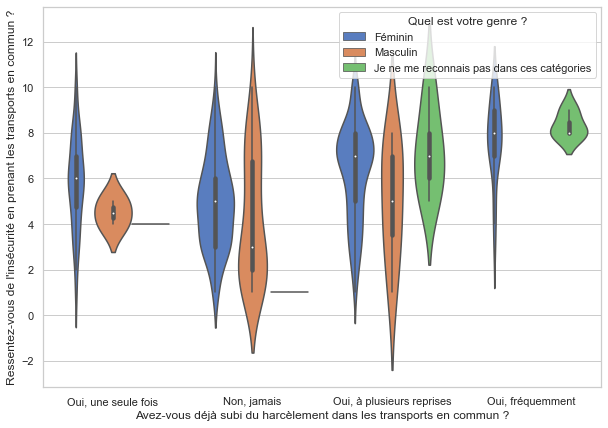

In [16]:
sns.set_style('whitegrid')
ax = sns.violinplot(x='Avez-vous déjà subi du harcèlement dans les transports en commun ?', y="Ressentez-vous de l'insécurité en prenant les transports en commun ?", hue="Quel est votre genre ?",data=data, palette="muted")#, inner="stick"

<AxesSubplot:xlabel='Avez-vous déjà subi du harcèlement dans les transports en commun ?', ylabel="Ressentez-vous de l'insécurité en prenant les transports en commun ?">

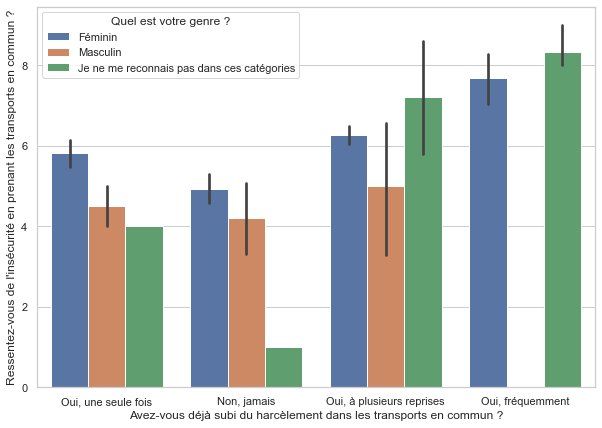

In [17]:
sns.barplot(data=data, x='Avez-vous déjà subi du harcèlement dans les transports en commun ?',y="Ressentez-vous de l'insécurité en prenant les transports en commun ?",hue="Quel est votre genre ?", dodge=True)

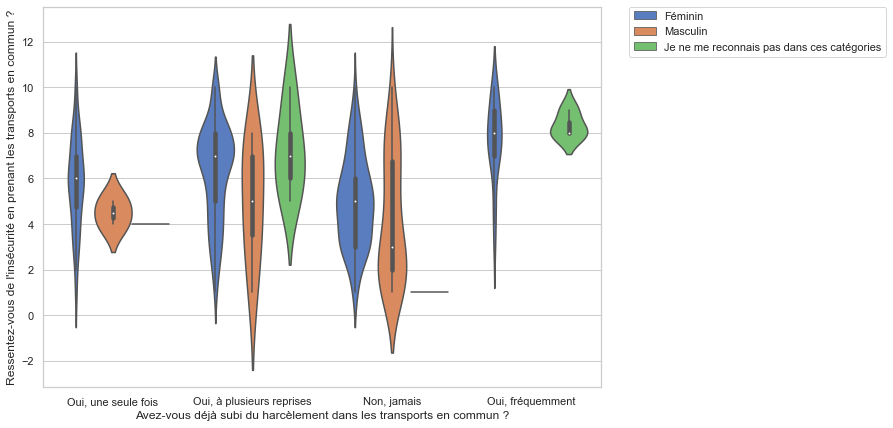

In [74]:
sns.violinplot(x = 'Avez-vous déjà subi du harcèlement dans les transports en commun ?', y = "Ressentez-vous de l'insécurité en prenant les transports en commun ?",hue="Quel est votre genre ?", data = data, palette="muted")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [18]:
order_list = ['Moins de 18 ans', '18 - 25 ans', '26 - 35 ans', '36 - 45 ans', '46 - 55 ans', '56 - 65 ans', 'Plus de 65 ans']

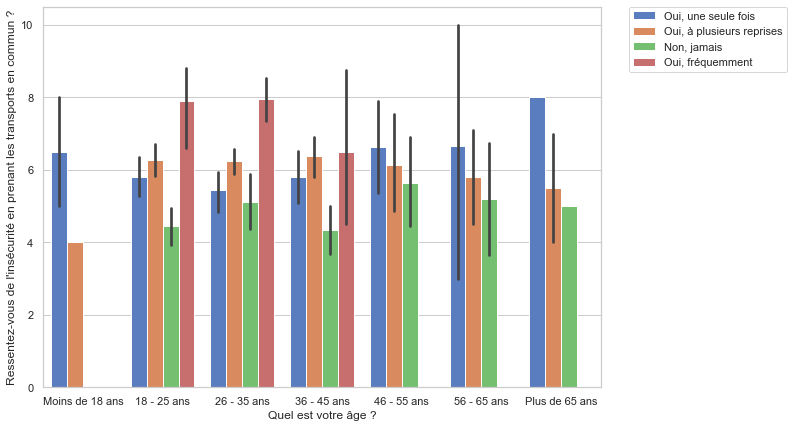

In [78]:
sns.barplot(x = "Quel est votre âge ?", y = "Ressentez-vous de l'insécurité en prenant les transports en commun ?", data = data, hue = 'Avez-vous déjà subi du harcèlement dans les transports en commun ?', palette="muted", order=order_list)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [8]:
order_list = ['Non, jamais', 'Oui, une seule fois', 'Oui, à plusieurs reprises', 'Oui, fréquemment']

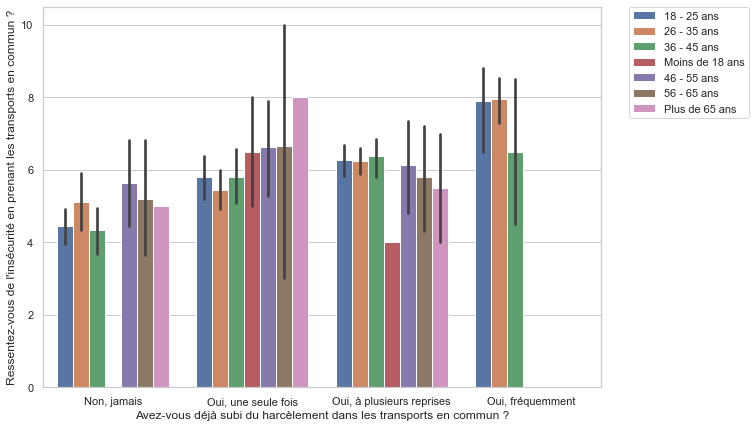

In [88]:
ax = sns.barplot(x='Avez-vous déjà subi du harcèlement dans les transports en commun ?', y="Ressentez-vous de l'insécurité en prenant les transports en commun ?", hue="Quel est votre genre ?",data=data, order=order_list)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

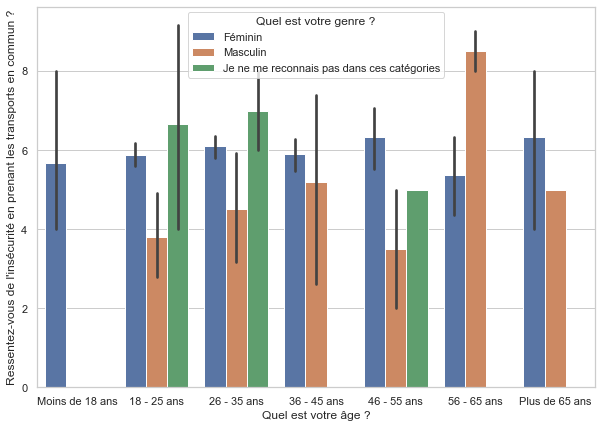

In [95]:
ax = sns.barplot(x='Quel est votre âge ?', y="Ressentez-vous de l'insécurité en prenant les transports en commun ?", hue="Quel est votre genre ?", data=data, order=order_list)

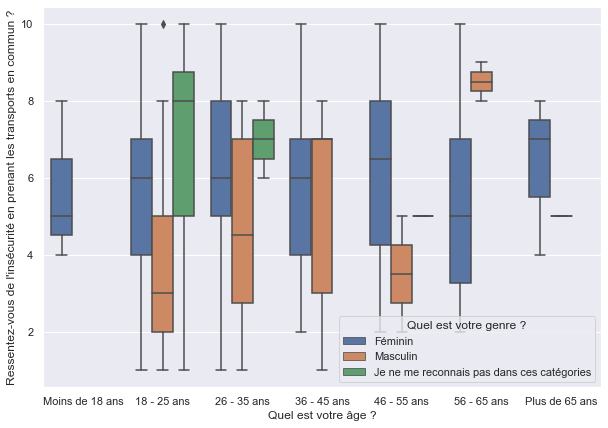

In [19]:
ax = sns.boxplot(x='Quel est votre âge ?', y="Ressentez-vous de l'insécurité en prenant les transports en commun ?", hue="Quel est votre genre ?", data=data, order=order_list)

<AxesSubplot:xlabel="Ressentez-vous de l'insécurité en prenant les transports en commun ?", ylabel='Count'>

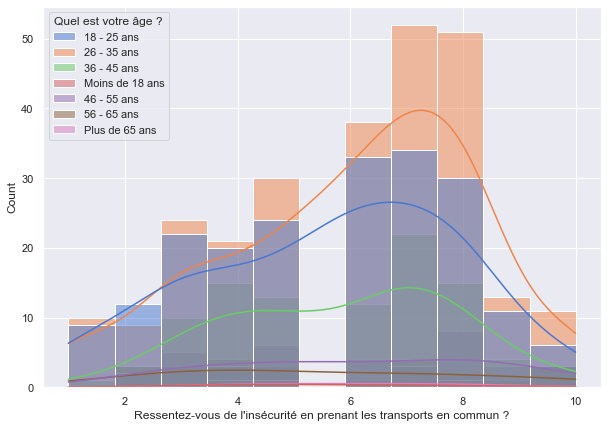

In [15]:
sns.histplot(data=data, x="Ressentez-vous de l'insécurité en prenant les transports en commun ?", hue='Quel est votre âge ?',kde=True, palette="muted")